In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#cargar datos 
puntajes = pd.read_csv("./A_INSCRITOS_PUNTAJES_2023_PAES_PUB_MRUN.csv", sep=";")
socioeconomic = pd.read_csv("./B_SOCIOECONOMICO_DOMICILIO_2023_PAES_PUB_MRUN.csv", sep=";")

/var/folders/yk/33518yf94tv1yp1xr6r_3n9h0000gn/T/ipykernel_91827/555967587.py:2: DtypeWarning: Columns (17,22,23,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  puntajes = pd.read_csv("./A_INSCRITOS_PUNTAJES_2023_PAES_PUB_MRUN.csv", sep=";")


In [3]:
#quite ciertos datos de socioeconomic que no ibamos a usar :p
new_1 = socioeconomic.drop(['FECHA_NACIMIENTO','ANYO_PROCESO', 'CODIGO_REGION_DOMICILIO','CODIGO_PROVINCIA_DOMICILIO','CODIGO_COMUNA_DOMICILIO','NOMBRE_COMUNA_DOMICILIO'], axis=1)

In [4]:
#quite unos datos de puntajes tambien
columnas_puntajes = ['MRUN', 'DEPENDENCIA', 'PROMEDIO_NOTAS','PTJE_NEM','PTJE_RANKING','CLEC_REG_ACTUAL','MATE1_REG_ACTUAL','MATE2_REG_ACTUAL','HCSOC_REG_ACTUAL','CIEN_REG_ACTUAL','PROMEDIO_CM_MAX','CLEC_MAX','MATE1_MAX','MATE2_MAX','HCSOC_MAX','CIEN_MAX']
new_2 = puntajes[columnas_puntajes]


In [5]:
#merge en MRUN
merged_new = pd.merge(new_1,new_2,on='MRUN')
merged_new

,MRUN,SEXO,INGRESO_PERCAPITA_GRUPO_FA,RAZON_PRINCIPAL_PAES,DISPOSITIVO_1,DISPOSITIVO_2,DISPOSITIVO_3,DISPOSITIVO_4,DISPOSITIVO_5,USO_DISPOSITIVO_1,...,MATE1_REG_ACTUAL,MATE2_REG_ACTUAL,HCSOC_REG_ACTUAL,CIEN_REG_ACTUAL,PROMEDIO_CM_MAX,CLEC_MAX,MATE1_MAX,MATE2_MAX,HCSOC_MAX,CIEN_MAX
0,3703667,1,8,1,S,N,S,N,N,3,...,846,558,836,748,831,816,846,728,950,748
1,8437289,1,6,2,N,N,S,N,N,0,...,0,0,0,0,0,0,0,0,0,0
2,17372901,1,5,6,N,N,N,S,N,0,...,499,0,0,412,"498,5",498,499,0,0,412
3,16702090,2,3,2,N,N,S,N,N,0,...,0,0,0,0,0,0,0,0,0,0
4,22654139,2,5,5,N,N,N,N,S,0,...,402,413,318,0,383,364,402,413,318,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296807,26526755,1,1,3,N,N,S,N,N,0,...,757,483,0,578,695,633,757,483,0,578
296808,26526694,1,2,3,S,N,S,N,N,2,...,516,313,0,498,"638,5",761,516,386,0,498
296809,26526332,1,1,3,N,N,S,N,N,0,...,480,332,578,500,531,582,480,403,578,500
296810,26525532,1,3,3,S,S,S,N,N,1,...,579,292,565,519,"592,5",606,579,292,565,519


Limpieza de datos!!!

In [6]:
tipos_dato = merged_new.dtypes 
print(tipos_dato)

MRUN                           int64
SEXO                           int64
INGRESO_PERCAPITA_GRUPO_FA     int64
RAZON_PRINCIPAL_PAES           int64
DISPOSITIVO_1                 object
DISPOSITIVO_2                 object
DISPOSITIVO_3                 object
DISPOSITIVO_4                 object
DISPOSITIVO_5                 object
USO_DISPOSITIVO_1              int64
USO_DISPOSITIVO_2              int64
USO_DISPOSITIVO_3              int64
HOGAR_CONEXION_INTERNET       object
CONEXION_INSUFICIENTE          int64
ESPACIO_1                     object
ESPACIO_2                     object
ESPACIO_3                     object
ESPACIO_4                     object
ESPACIO_5                     object
ESPACIO_6                     object
ESPACIO_7                     object
ESPACIO_8                     object
ESPACIO_9                     object
USO_ESPACIO_1                  int64
USO_ESPACIO_2                  int64
USO_ESPACIO_3                  int64
USO_ESPACIO_4                  int64
U

In [7]:
import numpy as np

#cambiar las comas por puntos
merged_new['PROMEDIO_CM_MAX'] = merged_new['PROMEDIO_CM_MAX'].str.replace(',', '.').astype(float)
merged_new['PROMEDIO_NOTAS'] = merged_new['PROMEDIO_NOTAS'].str.replace(',', '.').astype(float)

#para todas las columnas que poseen N o S se cambia por 0 o 1
cols = ['DISPOSITIVO_1', 'DISPOSITIVO_2', 'DISPOSITIVO_3', 'DISPOSITIVO_4', 'DISPOSITIVO_5', 'HOGAR_CONEXION_INTERNET', 'ESPACIO_1', 'ESPACIO_2', 'ESPACIO_3', 'ESPACIO_4', 'ESPACIO_5', 'ESPACIO_6', 'ESPACIO_7', 'ESPACIO_8', 'ESPACIO_9']

# Valores distintos a 'N' o 'S' se reemplazan por NaN
for col in cols:
    merged_new[col] = merged_new[col].apply(lambda x: x if x in ['N', 'S'] else np.nan)

# Eliminar los NaN
merged_new.dropna(subset=cols, inplace=True)

# Transformación de tipo
for col in cols:
    merged_new[col] = merged_new[col].str.replace('N', '0').str.replace('S', '1').astype(int)
    print(f"Columna transformada: {col}")

print("\nDataFrame después de la transformación:")
print(merged_new)

Columna transformada: DISPOSITIVO_1
Columna transformada: DISPOSITIVO_2
Columna transformada: DISPOSITIVO_3
Columna transformada: DISPOSITIVO_4
Columna transformada: DISPOSITIVO_5
Columna transformada: HOGAR_CONEXION_INTERNET
Columna transformada: ESPACIO_1
Columna transformada: ESPACIO_2
Columna transformada: ESPACIO_3
Columna transformada: ESPACIO_4
Columna transformada: ESPACIO_5
Columna transformada: ESPACIO_6
Columna transformada: ESPACIO_7
Columna transformada: ESPACIO_8
Columna transformada: ESPACIO_9

DataFrame después de la transformación:
            MRUN  SEXO  INGRESO_PERCAPITA_GRUPO_FA  RAZON_PRINCIPAL_PAES  \
0        3703667     1                           8                     1   
1        8437289     1                           6                     2   
2       17372901     1                           5                     6   
3       16702090     2                           3                     2   
4       22654139     2                           5               

In [8]:
#para los datos Nan que son discretos se cambian a 0, no se pone el promedio afecta el clustering parece xd
antes = merged_new.shape[0]
for col in merged_new.select_dtypes(include=['object']).columns:
    # merged_new[col] = merged_new[col].replace(' ', '0')
    # merged_new[col] = merged_new[col].astype(int)
    merged_new[col] = pd.to_numeric(merged_new[col], errors='coerce')
    merged_new = merged_new.dropna(subset=[col])
    print(f"Columna transformada: {col}")

print("Filas antes:")
print(antes)
print("Filas eliminadas:")
print(antes-merged_new.shape[0])

Columna transformada: DEPENDENCIA
Columna transformada: CLEC_REG_ACTUAL


/var/folders/yk/33518yf94tv1yp1xr6r_3n9h0000gn/T/ipykernel_91827/777654602.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_new[col] = pd.to_numeric(merged_new[col], errors='coerce')


Columna transformada: MATE1_REG_ACTUAL
Columna transformada: MATE2_REG_ACTUAL
Columna transformada: HCSOC_REG_ACTUAL
Columna transformada: CIEN_REG_ACTUAL
Filas antes:
285734
Filas eliminadas:
23077


Se empieza a hacer el clustering con ciertas columnas!!!

In [9]:
#seleccion de columnas para hacer el cluster 
data1 = merged_new[['PROMEDIO_CM_MAX', 'INGRESO_PERCAPITA_GRUPO_FA','RAZON_PRINCIPAL_PAES','USO_DISPOSITIVO_1','USO_DISPOSITIVO_2','USO_DISPOSITIVO_3','CONEXION_INSUFICIENTE','USO_ESPACIO_1','USO_ESPACIO_2','USO_ESPACIO_3','USO_ESPACIO_4','USO_ESPACIO_5','USO_ESPACIO_6','USO_ESPACIO_7','USO_ESPACIO_8','TRANQUILIDAD_COLEGIO','TRABAJO_GRUPO_COLEGIO']]
idxs = [1, 4, 7, 13]

#se filtran los datos que no necesitamos
data = data1[(data1['RAZON_PRINCIPAL_PAES'].isin([1,2,3,4,5,6,8]))& (data1['PROMEDIO_CM_MAX']>=200)&(data1['INGRESO_PERCAPITA_GRUPO_FA'] != 99)]

#esto es solamente si es que se quiere usar el promedio en las columnas pero no resulto creo
columns_to_check = ['RAZON_PRINCIPAL_PAES','PROMEDIO_CM_MAX','INGRESO_PERCAPITA_GRUPO_FA','USO_DISPOSITIVO_1', 'USO_DISPOSITIVO_2', 'USO_DISPOSITIVO_3', 
                    'USO_ESPACIO_1', 'USO_ESPACIO_2', 'USO_ESPACIO_3', 'USO_ESPACIO_4', 
                    'USO_ESPACIO_5', 'USO_ESPACIO_6', 'USO_ESPACIO_7', 'USO_ESPACIO_8', 
                    'CONEXION_INSUFICIENTE', 'TRANQUILIDAD_COLEGIO', 'TRABAJO_GRUPO_COLEGIO']

#se transforman los valores 0 o 9 a Nan
data[columns_to_check] = data[columns_to_check].replace([0, 9], np.nan)

# eliminar las filas que contienen NaN en las columnas especificadas
data = data.dropna(subset=columns_to_check)

#solo se hace el cluster con estos valores
columns = ['USO_DISPOSITIVO_1', 'USO_DISPOSITIVO_2', 'USO_DISPOSITIVO_3', 
            'USO_ESPACIO_1', 'USO_ESPACIO_2', 'USO_ESPACIO_3', 'USO_ESPACIO_4', 
            'USO_ESPACIO_5', 'USO_ESPACIO_6', 'USO_ESPACIO_7', 'USO_ESPACIO_8', 
            'CONEXION_INSUFICIENTE', 'TRANQUILIDAD_COLEGIO', 'TRABAJO_GRUPO_COLEGIO']

#new_data = data[columns]

data_promedio = data.pop('PROMEDIO_CM_MAX')
data


/var/folders/yk/33518yf94tv1yp1xr6r_3n9h0000gn/T/ipykernel_91827/4015618314.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[columns_to_check] = data[columns_to_check].replace([0, 9], np.nan)


,INGRESO_PERCAPITA_GRUPO_FA,RAZON_PRINCIPAL_PAES,USO_DISPOSITIVO_1,USO_DISPOSITIVO_2,USO_DISPOSITIVO_3,CONEXION_INSUFICIENTE,USO_ESPACIO_1,USO_ESPACIO_2,USO_ESPACIO_3,USO_ESPACIO_4,USO_ESPACIO_5,USO_ESPACIO_6,USO_ESPACIO_7,USO_ESPACIO_8,TRANQUILIDAD_COLEGIO,TRABAJO_GRUPO_COLEGIO
649,2.0,5,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0
659,1.0,3,4.0,1.0,4.0,1.0,4.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,5.0
663,3.0,6,1.0,1.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0
741,6.0,2,1.0,2.0,2.0,4.0,1.0,4.0,1.0,1.0,1.0,1.0,2.0,2.0,4.0,4.0
806,4.0,5,3.0,3.0,3.0,2.0,2.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295728,1.0,3,1.0,1.0,2.0,4.0,1.0,4.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0
295764,8.0,3,1.0,1.0,4.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,3.0,1.0,2.0,2.0
295812,5.0,3,1.0,1.0,3.0,3.0,2.0,4.0,2.0,4.0,1.0,1.0,2.0,1.0,5.0,4.0
296121,7.0,3,1.0,1.0,3.0,4.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,5.0


In [10]:
from sklearn.preprocessing import Normalizer
from sklearn.feature_selection import GenericUnivariateSelect, f_regression

#se normalizan los datos
normalizer = Normalizer()
scaled_data = normalizer.transform(data)


#se eligen los atributos que se utilizaran para hacer el cluster usando genericunivariateselect, de ahi lo podemos cambiar por otro, esto era para ver si funcionaba xd
#y = data['PROMEDIO_CM_MAX']

# remove PROMEDIO_CM_MAX from the features 
#scaled_data = scaled_data[:,??]

#se supone que al usar f_regression utiliza la correlacion de pearson para determinar que caracteristicas tienen mayor correlacion con promedio_max,
#selecciona el 50% de caracteristicas con mayor correlacion
#puede usarse percentil o kbest, pero kbest uno determina con un valor fijo
""" selector = GenericUnivariateSelect(score_func=f_regression, mode='percentile', param=50)
#selector.fit(scaled_data,y)

#atributos elegidos
selected_features = selector.transform(scaled_data)

support = selector.get_support()
selected_indices = np.where(support)[0]
#nombre de los atributos elegidos
selected_feature_names = data.columns[selected_indices]
selected_feature_names """

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but Normalizer was fitted without feature names
  warnings.warn(


" selector = GenericUnivariateSelect(score_func=f_regression, mode='percentile', param=50)\n#selector.fit(scaled_data,y)\n\n#atributos elegidos\nselected_features = selector.transform(scaled_data)\n\nsupport = selector.get_support()\nselected_indices = np.where(support)[0]\n#nombre de los atributos elegidos\nselected_feature_names = data.columns[selected_indices]\nselected_feature_names "

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

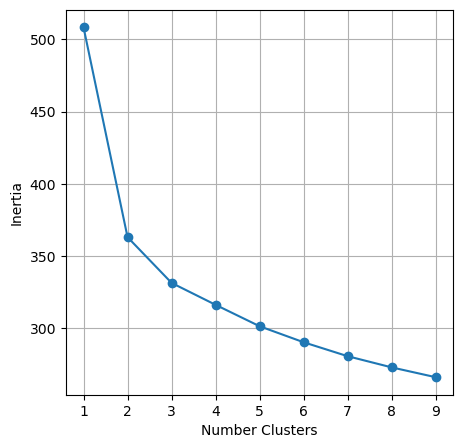

In [11]:
#revisar cuantos clusters crear
#inertia es SSE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline
def optimize_k_means(data,max_k):
    means = []
    inertias = []
    for k in range(1,max_k):
        k_means = KMeans(n_clusters=k)
        k_means.fit(data)
        means.append(k)
        inertias.append(k_means.inertia_)

    fig = plt.subplots(figsize=(5,5))
    plt.plot(means,inertias, 'o-')
    plt.xlabel('Number Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

optimize_k_means(scaled_data,10)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


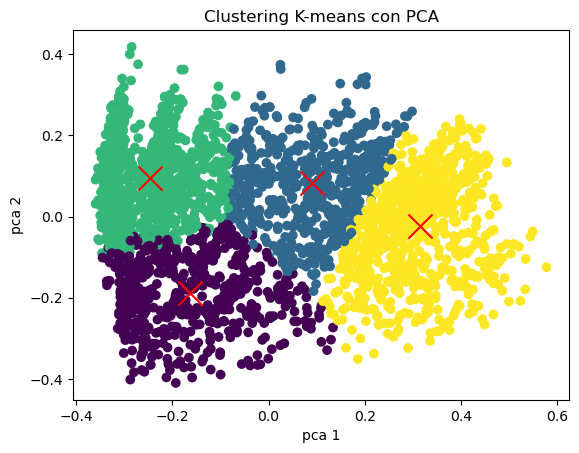

In [12]:
#se hacen dos clusters de kmeans para probar
from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters=4) #se toma el numero de clusters dependiendo del grafico de codo y se hace el kmeans clustering
kmeans.fit(scaled_data)
labels = kmeans.labels_

#estudiar los centroides
centroids = kmeans.cluster_centers_


pca2 = PCA(n_components=2, random_state=0)
x_pca = pca2.fit_transform(scaled_data)

# transformar los centroides al mismo espacio PCA
centroids_pca = pca2.transform(centroids)

#se visualiza el grafico
plt.scatter(x_pca[:,0], x_pca[:,1], c=labels, cmap='viridis')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=300, c='red', marker='x')
plt.title('Clustering K-means con PCA')
plt.xlabel('pca 1')
plt.ylabel('pca 2')
plt.show()


In [13]:

#transformar los centroides a dataframe para estudiarlo
centroids_df = pd.DataFrame(centroids, columns=data.columns.tolist())
print(centroids_df)


   INGRESO_PERCAPITA_GRUPO_FA  RAZON_PRINCIPAL_PAES  USO_DISPOSITIVO_1  \
0                    0.235641              0.336588           0.233494   
1                    0.490102              0.239438           0.172829   
2                    0.172380              0.276193           0.179043   
3                    0.671992              0.221903           0.179445   

   USO_DISPOSITIVO_2  USO_DISPOSITIVO_3  CONEXION_INSUFICIENTE  USO_ESPACIO_1  \
0           0.167801           0.375159               0.248399       0.155339   
1           0.133317           0.275845               0.176951       0.126655   
2           0.136219           0.308423               0.213804       0.145640   
3           0.135108           0.258958               0.144209       0.117226   

   USO_ESPACIO_2  USO_ESPACIO_3  USO_ESPACIO_4  USO_ESPACIO_5  USO_ESPACIO_6  \
0       0.280241       0.162083       0.167600       0.165736       0.149716   
1       0.205141       0.130910       0.140298       0.126259  

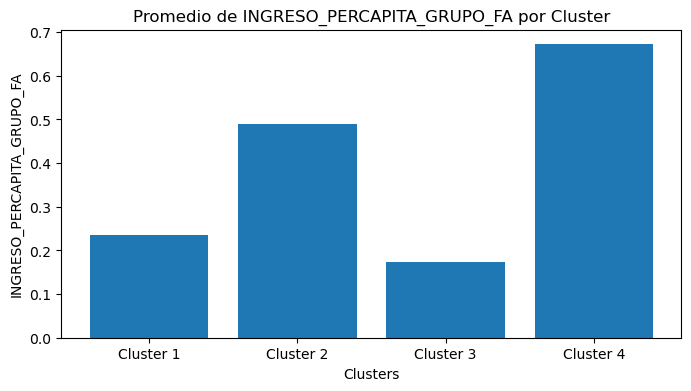

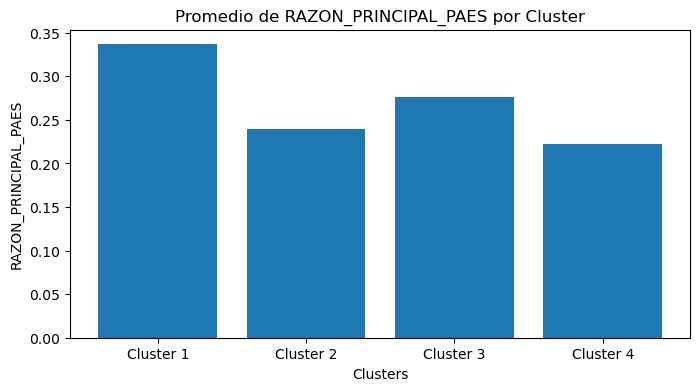

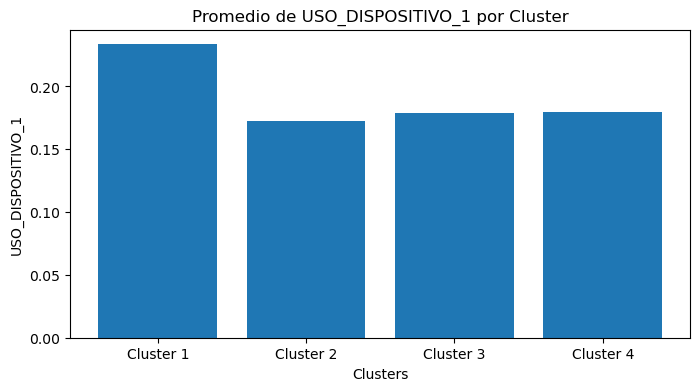

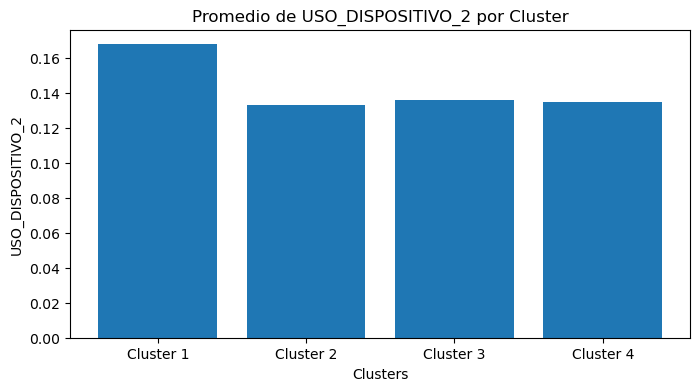

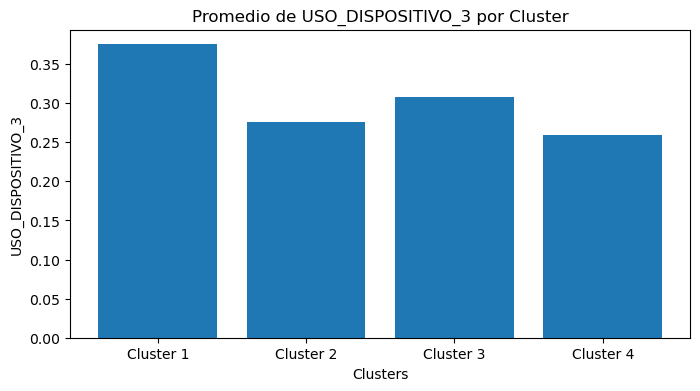

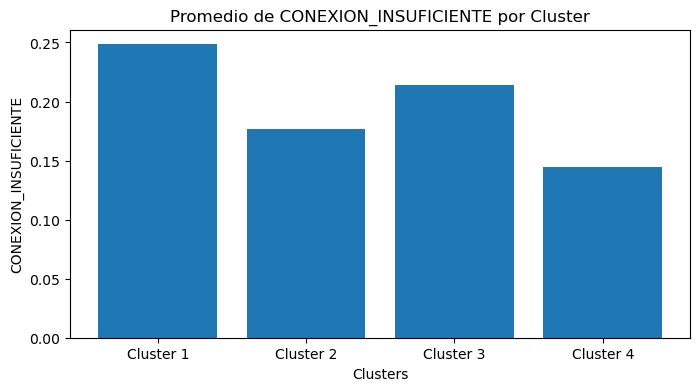

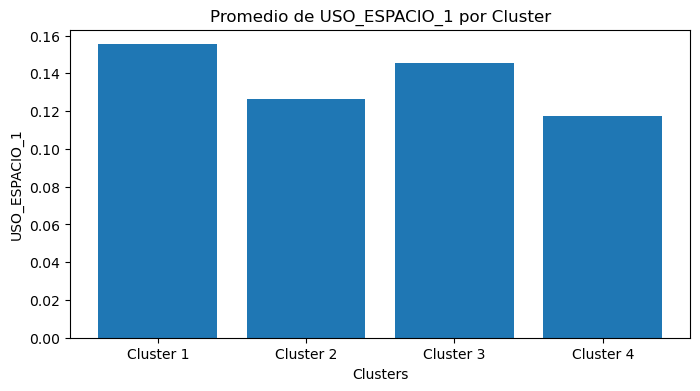

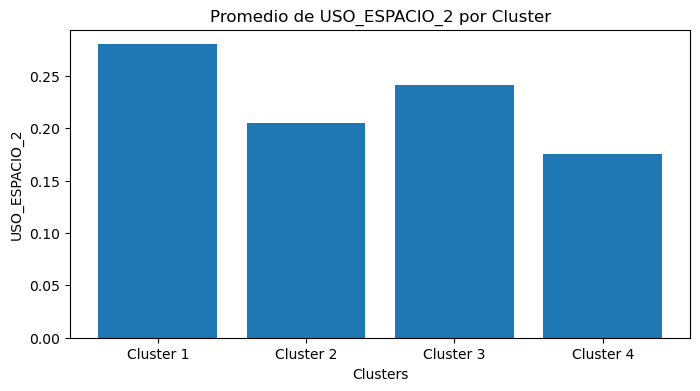

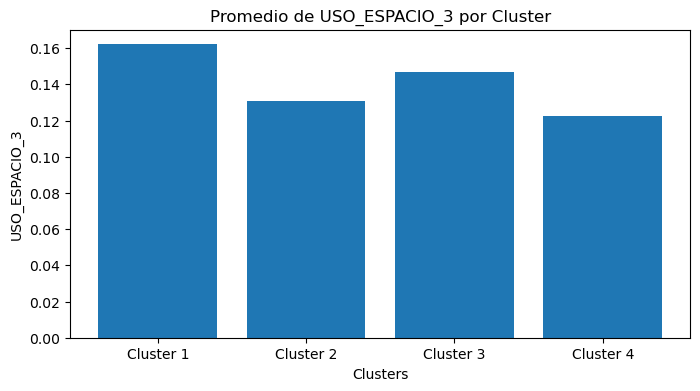

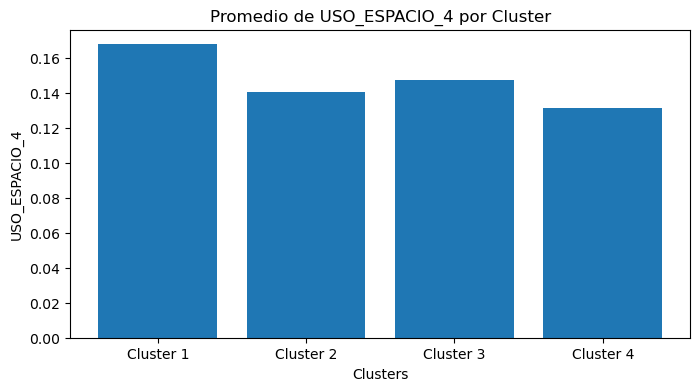

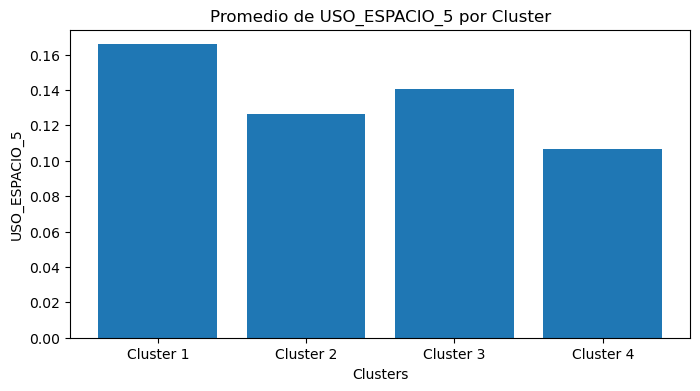

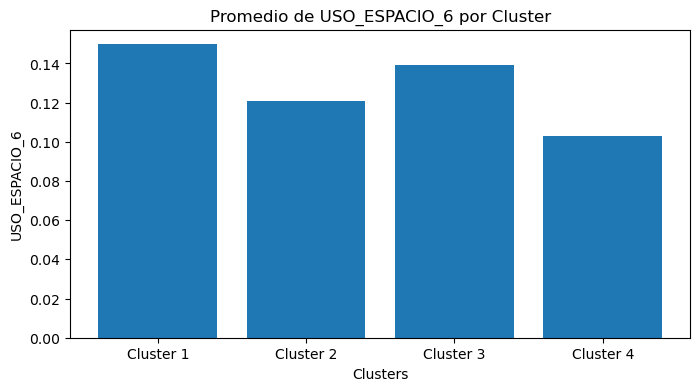

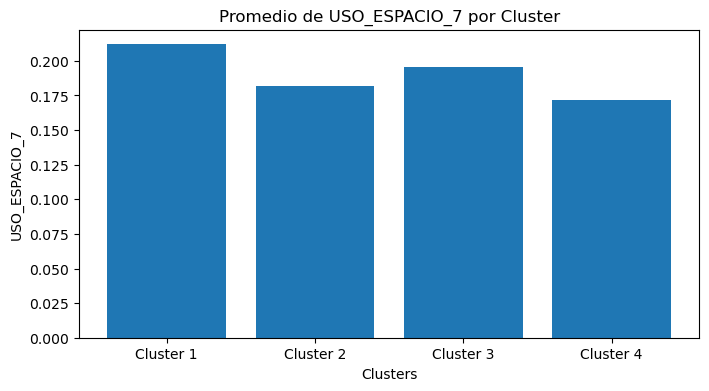

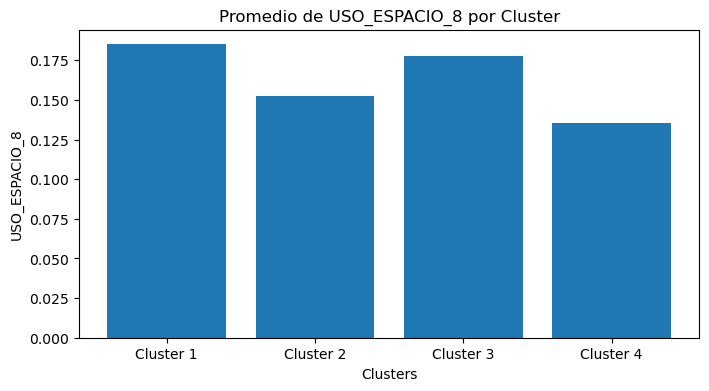

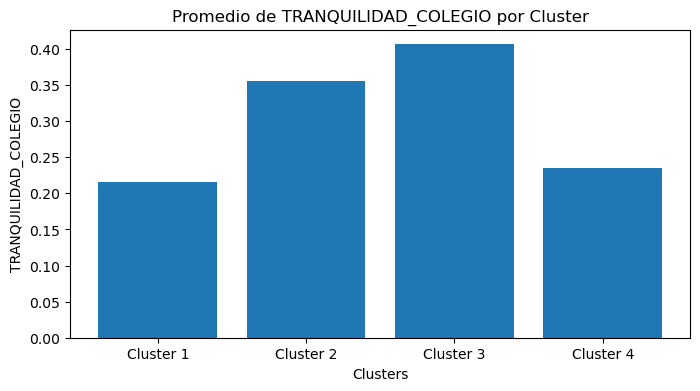

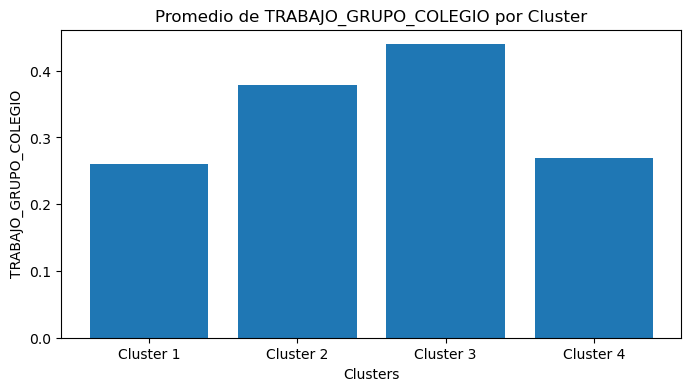

In [14]:
import matplotlib.pyplot as plt

# gráfico de barras para cada característica 
for column in centroids_df.columns:
    plt.figure(figsize=(8, 4))
    plt.bar(centroids_df.index, centroids_df[column], tick_label=['Cluster 1', 'Cluster 2','Cluster 3','Cluster 4'])
    plt.xlabel('Clusters')
    plt.ylabel(column)
    plt.title(f'Promedio de {column} por Cluster')
    plt.show()

Análisis??? Valores de los centroides en cada cluster

Cluster 1: Son estudiantes que desean estudiar una carrera (técnica/universitaria) con alta uso de dispositivo 3 (teléfono), no tiene conexión insuficiente, uso de salas de estudio, taller de cocina, talleres de tecnología, tiene sitio en su colegio para trabajar en grupo, pero no tiene correlación con el puntaje :c

In [15]:
data['promedio'] = data_promedio
data['label'] = labels
cluster0 = data[data['label']==0]
cluster1 = data[data['label']==1]  
cluster2 = data[data['label']==2]
cluster3 = data[data['label']==3]

In [16]:
cluster0.describe()

,INGRESO_PERCAPITA_GRUPO_FA,RAZON_PRINCIPAL_PAES,USO_DISPOSITIVO_1,USO_DISPOSITIVO_2,USO_DISPOSITIVO_3,CONEXION_INSUFICIENTE,USO_ESPACIO_1,USO_ESPACIO_2,USO_ESPACIO_3,USO_ESPACIO_4,USO_ESPACIO_5,USO_ESPACIO_6,USO_ESPACIO_7,USO_ESPACIO_8,TRANQUILIDAD_COLEGIO,TRABAJO_GRUPO_COLEGIO,promedio,label
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.0
mean,2.195000,3.078333,2.200000,1.581667,3.430000,2.225000,1.461667,2.640000,1.515000,1.578333,1.553333,1.403333,1.985000,1.748333,2.013333,2.468333,538.760833,0.0
std,1.113122,1.128858,1.191231,1.030421,0.842387,0.942969,0.844424,1.334179,0.841202,0.855424,0.963693,0.859391,0.939635,0.930828,0.952892,1.222629,91.105192,0.0
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,344.000000,0.0
25%,1.000000,3.000000,1.000000,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,477.875000,0.0
50%,2.000000,3.000000,2.000000,1.000000,4.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,524.000000,0.0
75%,3.000000,3.000000,3.000000,2.000000,4.000000,3.000000,2.000000,4.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,4.000000,586.500000,0.0
max,6.000000,8.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,945.500000,0.0


In [17]:
cluster1.describe()

,INGRESO_PERCAPITA_GRUPO_FA,RAZON_PRINCIPAL_PAES,USO_DISPOSITIVO_1,USO_DISPOSITIVO_2,USO_DISPOSITIVO_3,CONEXION_INSUFICIENTE,USO_ESPACIO_1,USO_ESPACIO_2,USO_ESPACIO_3,USO_ESPACIO_4,USO_ESPACIO_5,USO_ESPACIO_6,USO_ESPACIO_7,USO_ESPACIO_8,TRANQUILIDAD_COLEGIO,TRABAJO_GRUPO_COLEGIO,promedio,label
count,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.0
mean,5.751678,2.750000,2.023490,1.550336,3.179530,2.030201,1.483221,2.416107,1.533557,1.639262,1.479866,1.417785,2.122483,1.795302,4.132550,4.352349,564.176174,1.0
std,1.515881,0.847884,1.075058,0.955735,0.955999,0.941531,0.804224,1.262787,0.797400,0.863296,0.902618,0.872523,0.931303,0.906584,1.185719,0.832135,111.198535,0.0
min,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,314.500000,1.0
25%,4.000000,3.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,487.000000,1.0
50%,6.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,5.000000,5.000000,543.750000,1.0
75%,7.000000,3.000000,3.000000,2.000000,4.000000,3.000000,2.000000,4.000000,2.000000,2.000000,2.000000,1.000000,3.000000,2.000000,5.000000,5.000000,614.750000,1.0
max,10.000000,8.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,993.500000,1.0


In [18]:
cluster2.describe()

,INGRESO_PERCAPITA_GRUPO_FA,RAZON_PRINCIPAL_PAES,USO_DISPOSITIVO_1,USO_DISPOSITIVO_2,USO_DISPOSITIVO_3,CONEXION_INSUFICIENTE,USO_ESPACIO_1,USO_ESPACIO_2,USO_ESPACIO_3,USO_ESPACIO_4,USO_ESPACIO_5,USO_ESPACIO_6,USO_ESPACIO_7,USO_ESPACIO_8,TRANQUILIDAD_COLEGIO,TRABAJO_GRUPO_COLEGIO,promedio,label
count,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.0
mean,1.752554,2.780931,1.832009,1.384790,3.131669,2.149830,1.490352,2.481271,1.502838,1.502838,1.435868,1.416572,1.997730,1.821793,4.129398,4.410897,535.867196,2.0
std,0.820239,0.873030,0.984619,0.776469,0.976268,0.942809,0.793559,1.267577,0.790744,0.765924,0.823398,0.843503,0.889328,0.854814,1.172240,0.750193,96.597475,0.0
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,351.500000,2.0
25%,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,467.500000,2.0
50%,2.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,5.000000,5.000000,522.000000,2.0
75%,2.000000,3.000000,2.000000,1.000000,4.000000,3.000000,2.000000,4.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,5.000000,5.000000,586.500000,2.0
max,4.000000,8.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,979.000000,2.0


In [19]:
cluster3.describe()

,INGRESO_PERCAPITA_GRUPO_FA,RAZON_PRINCIPAL_PAES,USO_DISPOSITIVO_1,USO_DISPOSITIVO_2,USO_DISPOSITIVO_3,CONEXION_INSUFICIENTE,USO_ESPACIO_1,USO_ESPACIO_2,USO_ESPACIO_3,USO_ESPACIO_4,USO_ESPACIO_5,USO_ESPACIO_6,USO_ESPACIO_7,USO_ESPACIO_8,TRANQUILIDAD_COLEGIO,TRABAJO_GRUPO_COLEGIO,promedio,label
count,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.0
mean,8.651497,2.802395,2.317365,1.765269,3.286228,1.777246,1.518563,2.262275,1.589222,1.708982,1.372455,1.313772,2.232335,1.743713,3.093413,3.494611,629.762275,3.0
std,1.600954,0.990600,1.134217,1.100465,0.921754,0.863993,0.873581,1.290791,0.881534,0.897828,0.793534,0.721203,0.996954,0.882249,1.443049,1.319802,149.288617,0.0
min,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,316.500000,3.0
25%,7.000000,3.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,513.500000,3.0
50%,10.000000,3.000000,2.000000,1.000000,4.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,4.000000,4.000000,598.000000,3.0
75%,10.000000,3.000000,3.000000,2.000000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,1.000000,3.000000,2.000000,4.000000,5.000000,731.500000,3.0
max,10.000000,8.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,980.000000,3.0


In [20]:
from sklearn.metrics import silhouette_score
print("Dataset X K-Means 2\t", silhouette_score(scaled_data, kmeans.labels_))

Dataset X K-Means 2	 0.11816298614851423


In [21]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
def sim_matrix(features, labels):
    useful_labels = labels >= 0

    # primero ordenamos los datos en base al cluster que pertencen
    indices = np.argsort(labels[useful_labels])
    sorted_features = features[useful_labels][indices]

    # calculamos las similitud entre todos los puntos
    d = cosine_similarity(sorted_features, sorted_features)
    return d

def plot(data, model):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

    fig.suptitle(f"{model.__class__.__name__}")

    ax1.scatter(data[:,0], data[:,1], c=model.labels_)

    sim = sim_matrix(data, model.labels_)
    im = ax2.imshow(sim, cmap='cividis', vmin=0.0, vmax=1.0)
    fig.colorbar(im, ax=ax2)

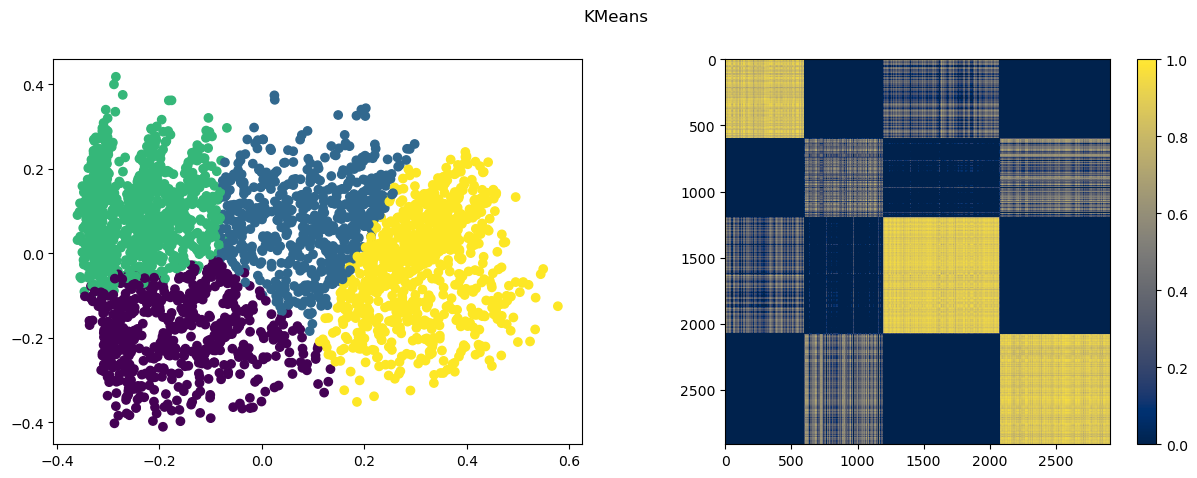

In [22]:
plot(x_pca, kmeans)
plt.show()

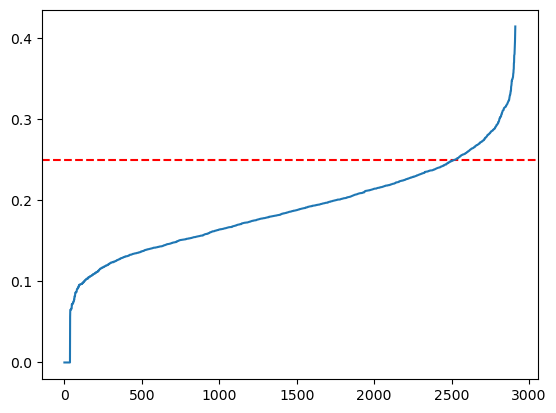

In [23]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

nbrs = NearestNeighbors(n_neighbors=3).fit(scaled_data)
distances, indices = nbrs.kneighbors(scaled_data)

distances = np.sort(distances, axis=0)
distances = distances[:,1]

fig, ax = plt.subplots()

ax.axhline(y=0.25, color='r', linestyle='--') # Ajuste el valor para y
ax.plot(distances)

plt.show()

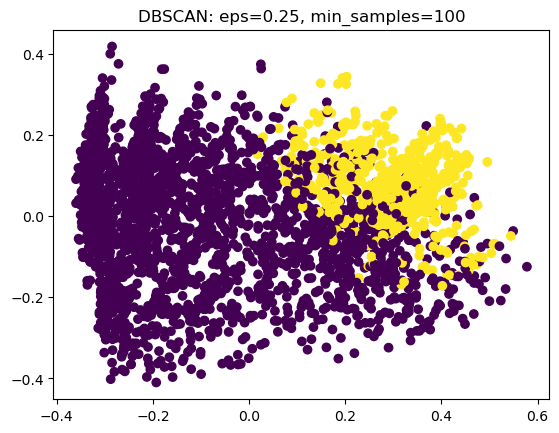

In [24]:
from sklearn.cluster import DBSCAN
eps = 0.25
min_samples = 100

dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(scaled_data)
plt.scatter(x_pca[:,0], x_pca[:,1], c=dbscan.labels_)
plt.title(f"DBSCAN: eps={eps}, min_samples={min_samples}")
plt.show()